# <span style="color: coral;"> Task 2- Email Spam Detection Using Python</span>

**This project was done by Suvam Sekhar Dash as a part of his Internship with Coderscave.**

### Table Of Contents:-

1) Importing The Python Libraries
2) Importing The Dataset
3) Getting Top 5 Rows Of The DataFrame
4) Getting Bottom 5 Rows Of The DataFrame
5) Getting Info About All The Columns In DataFrame 
6) Checking For Missing Values In The DataFrame
7) Splitting the data into training and testing data
8) Creating & Training Gausian Naive Bayes Model
9) Creating & Training Multinomial Naive Bayes Model
10) Creating and Training XGBoost Classifier Model
11) Creating and Training Decision Tree Model
12) Creating and Training Random Forest Model
13) Creating & Training Logistic Regression
14) Creating & Training Support Vector Clasifier
15) Creating Precision-Recall Curve
16) Creating ROC Curve

### Introduction

Email spam classification is the process of using machine learning algorithms to identify spam emails. Spam emails are unsolicited and unwanted emails that are often used to spread malware, phishing attacks, and other forms of cybercrime. Machine learning algorithms can be used to classify emails as spam or not spam by analyzing the features of the emails.

### Installing Python Libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### <span style="color: black;"> Importing The Python Libraries </span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

### <span style="color: black;"> Importing The Dataset</span>

In [3]:
df= pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Datasets\CodersCave\emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


### <span style="color: black;">Getting Top 5 Rows Of The DataFrame</span>

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


### <span style="color: black;">Getting Bottom 5 Rows Of The DataFrame</span>

In [5]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


### <span style="color: black;">Getting Info About All The Columns In DataFrame </span>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [8]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


### <span style="color: black;"> Checking For Missing Values In The DataFrame</span>

In [9]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

<Axes: >

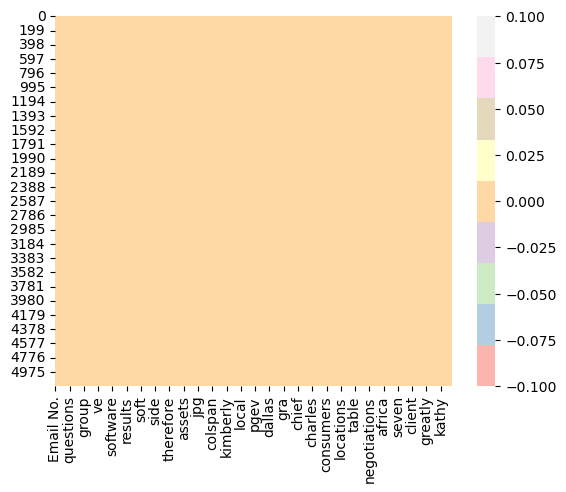

In [10]:
sns.heatmap(df.isnull(), cmap='Pastel1')

In [11]:
df = df.iloc[:, 1:]
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [12]:
df.nunique()

the           90
to            72
ect           90
and           53
for           42
              ..
military       4
allowing       3
ff            23
dry            4
Prediction     2
Length: 3001, dtype: int64

<Axes: xlabel='Prediction', ylabel='Density'>

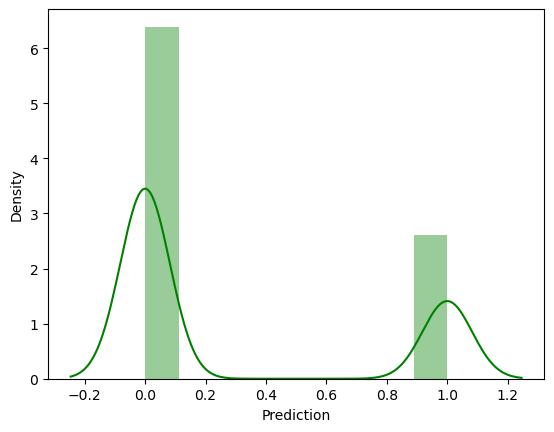

In [13]:
sns.distplot(df.Prediction, color='green' )

In [14]:
x = df.iloc[:, :3000].values
x



array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]], dtype=int64)

In [15]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

### Splitting the data into training and testing data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

### Creating & Training Gausian Naive Bayes Model

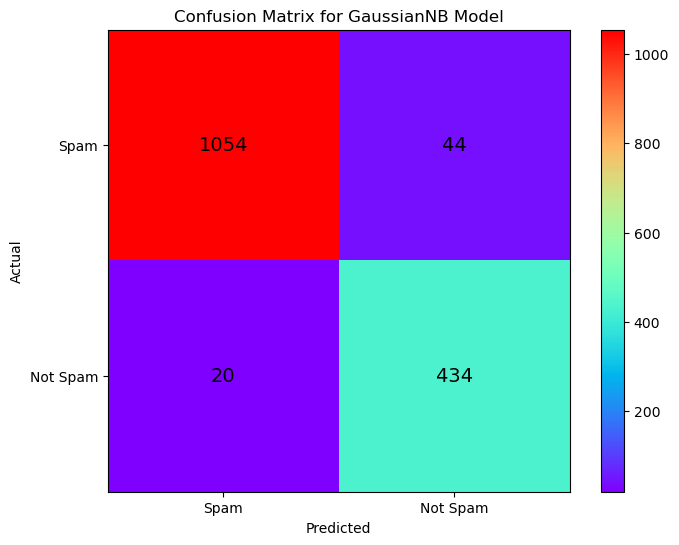

Precision: 0.9079497907949791
Recall: 0.9559471365638766
Accuracy Score: 0.9587628865979382
F1 Score: 0.9313304721030043


In [17]:
# Define a function to evaluate performance
def perform(y_test, y_pred):
    """Evaluates the performance of a model."""
    
    # Compute the confusion matrix
    confusion = confusion_matrix(y_test, y_pred)

    # Create a figure and axes for the heatmap
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a heatmap of the confusion matrix
    heatmap = ax.imshow(confusion, cmap='rainbow')

    # Add a colorbar
    fig.colorbar(heatmap, ax=ax)

    # Set labels for the x and y axes
    classes = ['Spam', 'Not Spam']
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    # Label the axes and set the title
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix for GaussianNB Model')

    # Display the counts in the heatmap
    for i in range(len(classes)):
        for j in range(len(classes)):
            text = ax.text(j, i, confusion[i, j], ha='center', va='center', color='black', fontsize=14)

    # Display the plot
    plt.show()
    
    
# Calculate and print evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy Score:", accuracy)
    print("F1 Score:", f1)

# Create a pipeline with Gaussian Naive Bayes classifier
pipeline = make_pipeline(GaussianNB())

# Fit the model and make predictions in one step
y_pred_nb = pipeline.fit(x_train, y_train).predict(x_test)

# Evaluate performance
perform(y_test, y_pred_nb)


### Observations:-

1) The model correctly classified 1054 spam emails and 434 non-spam emails. These are the true positives and true negatives, respectively, and they are shown in the re and blue squares.



2) The model incorrectly classified 44 non-spam emails as spam and 20 spam emails as non-spam. These are the false positives and false negatives, respectively, and they are shown in the purple squares.

3) The model has a precision of 0.908, which means that out of all the emails that the model predicted as spam, 90.8% were actually spam.

4) The model has a recall of 0.956, which means that out of all the spam emails in the dataset, the model identified 95.6% of them correctly.

5) The model has an F1 score of 0.931, which is a harmonic mean of precision and recall. It is a measure of the model’s overall accuracy.

6. The model has an accuracy score of 0.959, which means that out of all the emails in the dataset, the model correctly classified 95.9% of them.

 ### Creating & Training Multinomial Naive Bayes

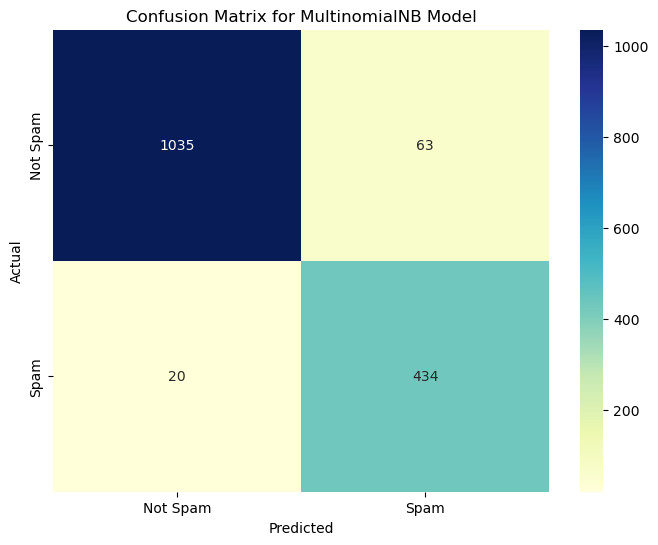

Precision: 0.8732394366197183
Recall: 0.9559471365638766
Accuracy Score: 0.946520618556701
F1 Score: 0.9127234490010515


In [29]:
def perform(y_test, y_pred):
    """Evaluates the performance of a model."""
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='d')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for MultinomialNB Model')

    plt.xticks(np.arange(2) + 0.5, ['Not Spam', 'Spam'])
    plt.yticks(np.arange(2) + 0.5, ['Not Spam', 'Spam'])

    plt.show()
    
    # Calculate and print evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy Score:", accuracy)
    print("F1 Score:", f1)


# Create a pipeline
pipeline = make_pipeline(MultinomialNB())

# Fit the model and make predictions in one step
y_pred_mnb = pipeline.fit(x_train, y_train).predict(x_test)

# Evaluate performance
perform(y_test, y_pred_mnb)


### Observations:-

**The heatmap in this image shows the performance of a Multinomial Naive Bayes model on a binary classification task. Here are some insights from the image:-**

1) The model correctly classified 1035 non-spam emails and 434 spam emails. These are the true negatives and true positives, respectively, and they are shown in the  blue quadrants.

2) The model incorrectly classified 63 non-spam emails as spam and 20 spam emails as non-spam. These are the false positives and false negatives, respectively, and they are shown in the white quadrants.


3) The model has a precision of 0.873, which means that out of all the emails that the model predicted as spam, 87.3% were actually spam.

4) The model has a recall of 0.956, which means that out of all the spam emails in the dataset, the model identified 95.6% of them correctly.

5) The model has an F1 score of 0.913, which is a harmonic mean of precision and recall. It is a measure of the model’s overall accuracy.

6) The model has an accuracy score of 0.947, which means that out of all the emails in the dataset, the model correctly classified 94.7% of them.

**These metrics indicate that the model has a high performance on the classification task, and it can effectively distinguish between spam and non-spam emails. However, there is still some room for improvement, especially in reducing the false positives, which are non-spam emails that the model wrongly labeled as spam,**

### Creating and Training XGBoost Classifier Model

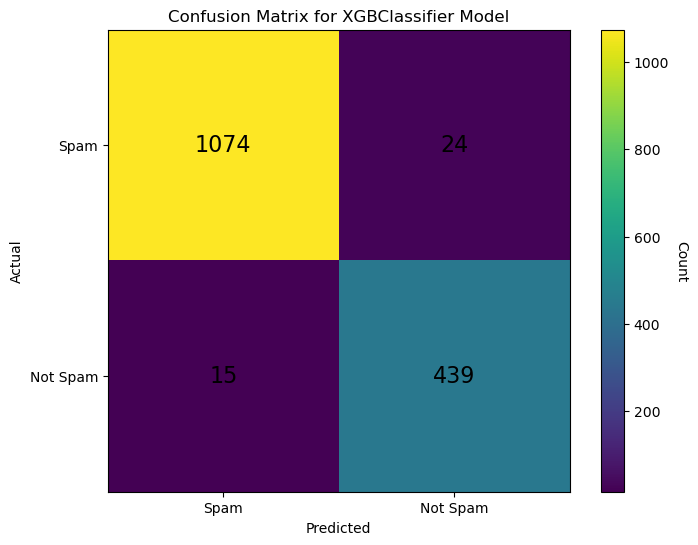

Precision: 0.9481641468682506
Recall: 0.9669603524229075
Accuracy Score: 0.9748711340206185
F1 Score: 0.9574700109051254


In [19]:
def perform(y_test, y_pred, cmap='viridis'):
    """Evaluates the performance of a model, generates a heatmap of the confusion matrix, and prints evaluation metrics."""
    
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Set labels for the classes
    classes = ['Spam', 'Not Spam']
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Label the axes
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Count', rotation=-90, va="bottom")
    
    # Display the values on the heatmap
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="black", fontsize=16)
    
    ax.set_title('Confusion Matrix for XGBClassifier Model')
    
    plt.show()
    
    # Calculate and print evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy Score:", accuracy)
    print("F1 Score:", f1)

# Fit the model and make predictions in one step
xgb = XGBClassifier().fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

# Evaluate performance with the viridis colormap and print metrics
perform(y_test, y_pred_xgb, cmap='viridis')


### Observations:-

**The heatmap in this image shows the performance of an XGBClassifier model on a binary classification task. Here are some insights from the image:-**

1) The model correctly classified 1074 spam emails and 439 non-spam emails. These are the true negatives and true positives, respectively, and they are shown in the yellow and blue quadrants.

2) The model incorrectly classified 24 non-spam emails as spam  and 15 spam emails as non-spam. These are the false positives and false negatives, respectively, and they are shown in the yellow and red quadrants.

3) The model has a precision of 0.948, which means that out of all the emails that the model predicted as spam, 94.8% were actually spam.

4) The model has a recall of 0.967, which means that out of all the spam emails in the dataset, the model identified 96.7% of them correctly.

5) The model has an F1 score of 0.957, which is a harmonic mean of precision and recall. It is a measure of the model’s overall accuracy.

6) The model has an accuracy score of 0.975, which means that out of all the emails in the dataset, the model correctly classified 97.5% of them.

**These metrics indicate that the model has a very high performance on the classification task, and it can effectively distinguish between spam and non-spam emails. The model has very low rates of false positives and false negatives, which means that it rarely makes mistakes in labeling emails. The model is very precise, sensitive, and accurate in its predictions.**

### Creating and Training Decision Tree Model

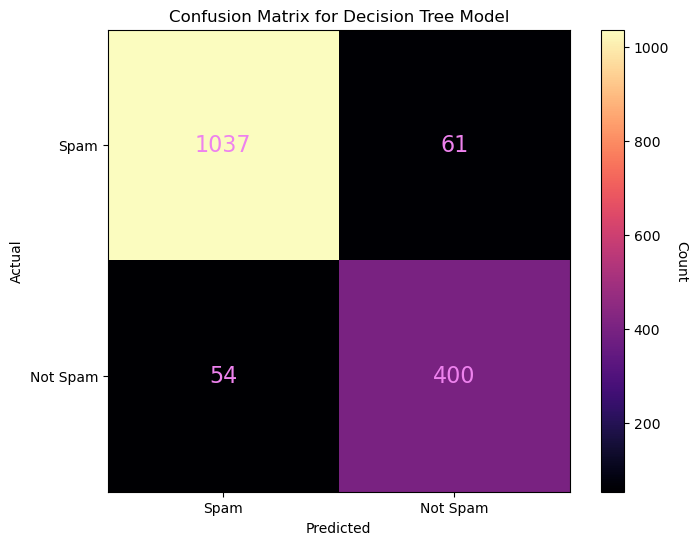

Precision: 0.8676789587852495
Recall: 0.8810572687224669
Accuracy Score: 0.9259020618556701
F1 Score: 0.8743169398907105


In [20]:
def perform(y_test, y_pred, cmap='viridis'):
    """Evaluates the performance of a model, generates a heatmap of the confusion matrix, and prints evaluation metrics."""
    
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Set labels for the classes
    classes = ['Spam', 'Not Spam']
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Label the axes
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Count', rotation=-90, va="bottom")
    
    # Display the values on the heatmap
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="violet", fontsize=16)
    
    ax.set_title('Confusion Matrix for Decision Tree Model')
    
    plt.show()
    
    # Calculate and print evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy Score:", accuracy)
    print("F1 Score:", f1)

# Create and fit the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt.predict(x_test)

# Evaluate performance with the viridis colormap and print metrics
perform(y_test, y_pred_dt, cmap='magma')


### Observations

**The heatmap in this image shows the performance of a decision tree model on a binary classification task. Here are some insights from the image:**

1) The model correctly classified 1037 spam emails and 400 non-spam emails. These are the true negatives and true positives, respectively, and they are shown in the yellow and violet quadrants.

2) The model incorrectly classified 54 non-spam emails as spam and 61 spam emails as non-spam. These are the false positives and false negatives, respectively, and they are shown in the orange and purple quadrants.

3) The model has a precision of 0.868, which means that out of all the emails that the model predicted as spam, 86.8% were actually spam.

4) The model has a recall of 0.881, which means that out of all the spam emails in the dataset, the model identified 88.1% of them correctly.

5) The model has an F1 score of 0.874, which is a harmonic mean of precision and recall. It is a measure of the model’s overall accuracy.

6) The model has an accuracy score of 0.926, which means that out of all the emails in the dataset, the model correctly classified 92.6% of them.

**These metrics indicate that the model has a good performance on the classification task, and it can distinguish between spam and non-spam emails reasonably well. However, there is still some room for improvement, especially in reducing the false negatives, which are spam emails that the model failed to detect.**

### Creating and Training Random Forest Model

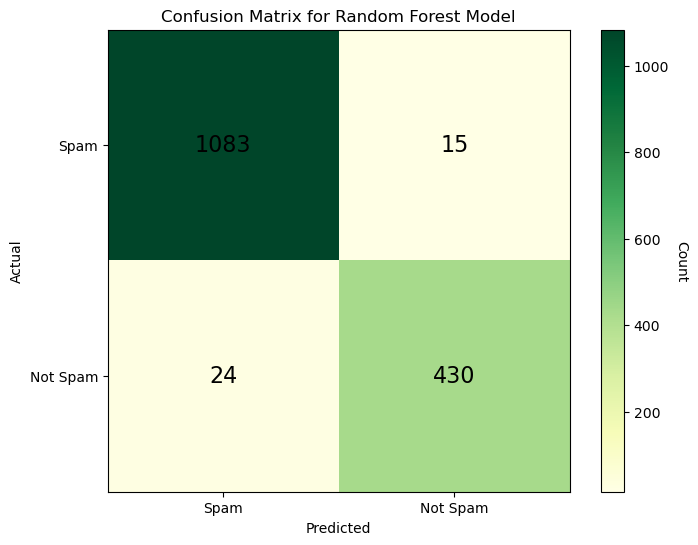

Precision: 0.9662921348314607
Recall: 0.947136563876652
Accuracy Score: 0.9748711340206185
F1 Score: 0.9566184649610678


In [23]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def perform(y_test, y_pred, cmap='viridis'):
    """Evaluates the performance of a model, generates a heatmap of the confusion matrix, and prints evaluation metrics."""
    
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Set labels for the classes
    classes = ['Spam', 'Not Spam']
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Label the axes
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Count', rotation=-90, va="bottom")
    
    # Display the values on the heatmap
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="black", fontsize=16)
    
    ax.set_title('Confusion Matrix for Random Forest Model')
    
    plt.show()
    
    # Calculate and print evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy Score:", accuracy)
    print("F1 Score:", f1)

# Create and fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf.predict(x_test)

# Evaluate performance with the viridis colormap and print metrics
perform(y_test, y_pred_rf, cmap='YlGn')


### Observations

**The heatmap in this image shows the performance of a Random Forest model on a binary classification task. Here are some insights from the image:**

1) The model correctly classified 1083 spam emails and 400 spam emails. These are the true negatives and true positives, respectively, and they are shown in the  green quadrants.

2) The model incorrectly classified 15 spam emails as non-spam and 24 non-spam emails as spam. These are the false positives and false negatives, respectively, and they are shown in the orange and purple quadrants.

3) The model has a precision of 0.96, which means that out of all the emails that the model predicted as spam, 96% were actually spam.

4) The model has a recall of 0.947, which means that out of all the spam emails in the dataset, the model identified 94.7 of them correctly.

5) The model has an F1 score of 0.956, which is a harmonic mean of precision and recall. It is a measure of the model’s overall accuracy.

6) The model has an accuracy score of 0.975, which means that out of all the emails in the dataset, the model correctly classified 97.5% of them.

**These metrics indicate that the model has a good performance on the classification task, and it can distinguish between spam and non-spam emails reasonably well. However, there is still some room for improvement, especially in reducing the false negatives, which are spam emails that the model failed to detect.**

### Creating & Training Logistic Regression

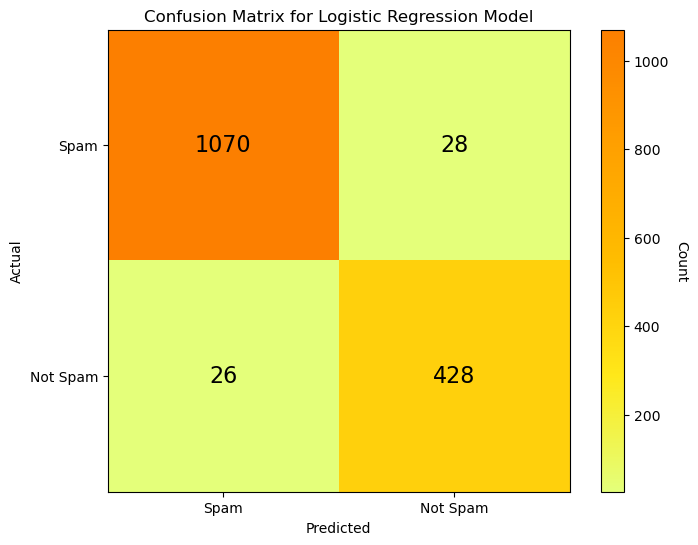

Precision: 0.9385964912280702
Recall: 0.9427312775330396
Accuracy Score: 0.9652061855670103
F1 Score: 0.9406593406593406


In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def perform(y_test, y_pred, cmap='viridis'):
    """Evaluates the performance of a model, generates a heatmap of the confusion matrix, and prints evaluation metrics."""
    
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Set labels for the classes
    classes = ['Spam', 'Not Spam']
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Label the axes
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Count', rotation=-90, va="bottom")
    
    # Display the values on the heatmap
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="black", fontsize=16)
    
    ax.set_title('Confusion Matrix for Logistic Regression Model')
    
    plt.show()
    
    # Calculate and print evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy Score:", accuracy)
    print("F1 Score:", f1)

# Create and fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Make predictions
y_pred_lr = lr.predict(x_test)

# Evaluate performance with the viridis colormap and print metrics
perform(y_test, y_pred_lr, cmap='Wistia')


### Observations

**The heatmap in this image shows the performance of a Random Forest model on a binary classification task. Here are some insights from the image:**

1) The model has a high accuracy score of 0.9652061855670103, which means it correctly predicts 96.52% of the emails.
2) The model has a high precision score of 0.9385964912280702, which means it labels 93.86% of the spam emails correctly.
3) The model has a high recall score of 0.9427312775330396, which means it identifies 94.27% of the actual spam emails.
4) The model has a high F1 score of 0.9406593406593406, which means it has a good balance between precision and recall.
5) The model misclassifies 28 emails as spam when they are not spam (false positives) and 26 emails as not spam when they are spam (false negatives).
6) The model correctly classifies 428 emails as not spam (true negatives) and 1070 emails as spam (true positives).
7) The model performs slightly better on detecting spam emails than not spam emails, as it has more true positives than true negatives.


**These metrics indicate that the model has a good performance on the classification task, and it can distinguish between spam and non-spam emails reasonably well. However, there is still some room for improvement, especially in reducing the false negatives, which are spam emails that the model failed to detect.**

### Creating & Training Support Vector Clasifier

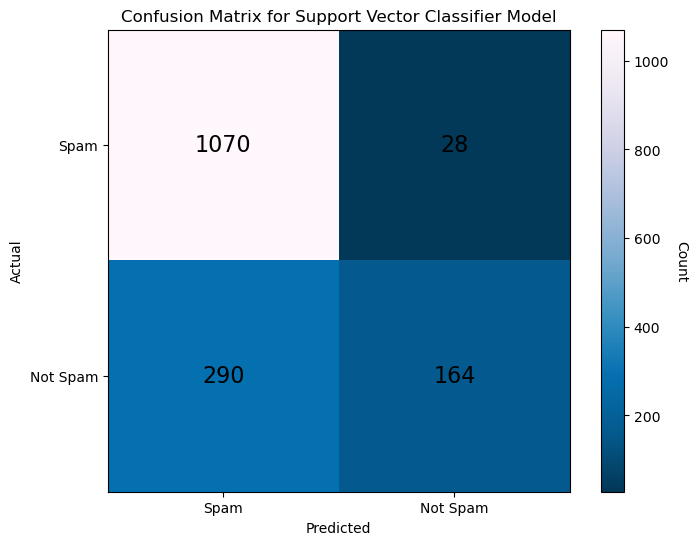

Precision: 0.8541666666666666
Recall: 0.36123348017621143
Accuracy Score: 0.7951030927835051
F1 Score: 0.5077399380804953


In [25]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def perform(y_test, y_pred, cmap='viridis'):
    """Evaluates the performance of a model, generates a heatmap of the confusion matrix, and prints evaluation metrics."""
    
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Set labels for the classes
    classes = ['Spam', 'Not Spam']
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Label the axes
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Count', rotation=-90, va="bottom")
    
    # Display the values on the heatmap
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="black", fontsize=16)
    
    ax.set_title('Confusion Matrix for Support Vector Classifier Model')
    
    plt.show()
    
    # Calculate and print evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy Score:", accuracy)
    print("F1 Score:", f1)

# Create and fit the Support Vector Classifier model
svc = SVC()
svc.fit(x_train, y_train)

# Make predictions
y_pred_svc = svc.predict(x_test)

# Evaluate performance with the viridis colormap and print metrics
perform(y_test, y_pred_svc, cmap='PuBu_r')


### Observations

**The heatmap in this image shows the performance of a Random Forest model on a binary classification task. Here are some insights from the image:**

1) The model has a high accuracy score of 0.795, which means that it correctly classified 79.5% of the emails as spam or not spam.

2) The model has a low recall of 0.361, which means that it only identified 36.1% of the actual spam emails as spam. The rest were classified as not spam, which is a type of error called false negative.

3) The model has a high precision of 0.854, which means that 85.4% of the emails that it labeled as spam were actually spam. The rest were classified as spam by mistake, which is a type of error called false positive.

4) The model has a moderate F1 score of 0.508, which is a harmonic mean of precision and recall. It indicates how well the model balances the trade-off between false positives and false negatives.

5) The confusion matrix shows that the model predicted 1070 emails as spam and 164 emails as not spam correctly. However, it also predicted 28 emails as spam and 290 emails as not spam incorrectly.

6) The model is successful in minimizing false positives, but not very good at minimizing false negatives. This means that it is more likely to miss some spam emails than to mark some legitimate emails as spam.

**The model could be improved by using more data, tuning the hyperparameters, or using a different algorithm.**

### Precision-Recall Curve 

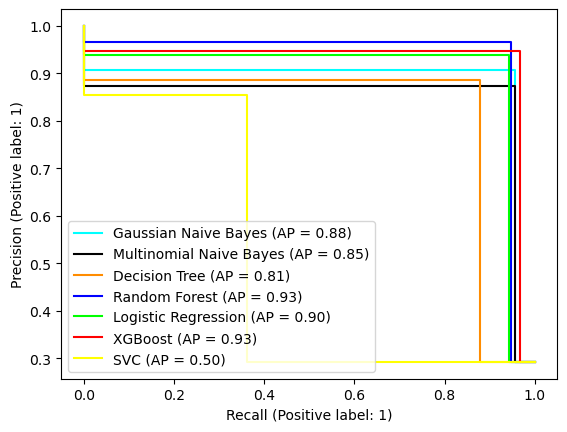

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics._plot.precision_recall_curve import PrecisionRecallDisplay

# Define a list of dictionaries with display parameters
display_params = [
    {"y_true": y_test, "y_pred": y_pred_nb, "name": "Gaussian Naive Bayes", "color": "cyan"},
    {"y_true": y_test, "y_pred": y_pred_mnb, "name": "Multinomial Naive Bayes", "color": "black"},
    {"y_true": y_test, "y_pred": y_pred_dt, "name": "Decision Tree", "color": "darkorange"},
    {"y_true": y_test, "y_pred": y_pred_rf, "name": "Random Forest", "color": "blue"},
    {"y_true": y_test, "y_pred": y_pred_lr, "name": "Logistic Regression", "color": "lime"},
    {"y_true": y_test, "y_pred": y_pred_xgb, "name": "XGBoost", "color": "red"},
    {"y_true": y_test, "y_pred": y_pred_svc, "name": "SVC", "color": "yellow"}
]

# Create a subplots
fig, ax = plt.subplots()

# Iterate through the display parameters and create plots
for params in display_params:
    PrecisionRecallDisplay.from_predictions(params["y_true"], params["y_pred"], name=params["name"], color=params["color"], ax=ax)

plt.show()



### Observations

**The graph compares the performance of six machine learning algorithms in terms of precision and recall for spam and not spam classification.**

1) Precision is the ratio of true positives to all predicted positives, and recall is the ratio of true positives to all actual positives.A higher precision means that the algorithm is more accurate in labeling emails as spam, and a higher recall means that the algorithm is more sensitive in detecting spam emails.

2) The graph shows that Random Forest and XG Boost has the highest precision and recall among all the algorithms, with a value of 0.93 for both metrics. This means that Random Forest and XG Boosts are the best algorithm for spam and not spam classification, as it can correctly identify most of the spam and not spam emails.

3) The graph shows that SVC has the lowest precision and recall among all the algorithms, with a value of 0.50 and 0.30 respectively. This means that SVC is the worst algorithm for spam and not spam classification, as it can only identify half of the spam emails and less than a third of the not spam emails.

4) The graph shows that Gaussian Naive Bayes has a high recall but a low precision, which means that it can detect most of the spam emails but also misclassify many not spam emails as spam. This could lead to a high false positive rate, which is undesirable for email users.

5) The graph shows that Logistic Regression, Decision Tree, and Multinomial Naive Bayes have similar precision and recall values, ranging from 0.80 to 0.90. This means that they are moderately good algorithms for spam and not spam classification, but not as good as Random Forest.

### ROC Curve

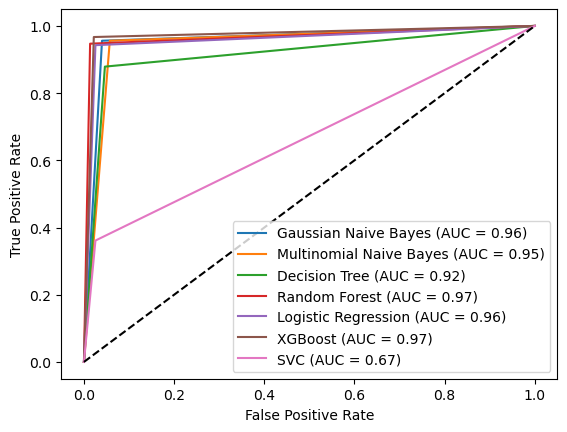

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Define a list of dictionaries with display parameters
display_params = [
    {"y_true": y_test, "y_score": y_pred_nb, "label": "Gaussian Naive Bayes"},
    {"y_true": y_test, "y_score": y_pred_mnb, "label": "Multinomial Naive Bayes"},
    {"y_true": y_test, "y_score": y_pred_dt, "label": "Decision Tree"},
    {"y_true": y_test, "y_score": y_pred_rf, "label": "Random Forest"},
    {"y_true": y_test, "y_score": y_pred_lr, "label": "Logistic Regression"},
    {"y_true": y_test, "y_score": y_pred_xgb, "label": "XGBoost"},
    {"y_true": y_test, "y_score": y_pred_svc, "label": "SVC"}
]

# Create a subplots
fig, ax = plt.subplots()

# Iterate through the display parameters and create ROC curves
for params in display_params:
    fpr, tpr, _ = roc_curve(params["y_true"], params["y_score"])
    auc_value = roc_auc_score(params["y_true"], params["y_score"])
    plt.plot(fpr, tpr, label=f"{params['label']} (AUC = {auc_value:.2f})")

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color="black", linestyle="--")

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.show()


### Observations

**The graph shows the Receiver Operating Characteristic (ROC) curve for different machine learning algorithms that are used to classify emails as spam or not spam.**

1) The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) for different threshold values of the classifier. The TPR is the proportion of spam emails that are correctly identified as spam, and the FPR is the proportion of not spam emails that are incorrectly identified as spam.

2) The graph has a diagonal line that represents a random classifier, which has a TPR and FPR equal to the positive class frequency. Any algorithm that lies above this line is better than a random classifier.

3) The graph also has an area under the curve (AUC) metric for each algorithm, which is the probability that the classifier will rank a randomly chosen spam email higher than a randomly chosen not spam email. A higher AUC indicates a better performance of the algorithm.

4) The graph shows that XGBoost has the highest AUC of 0.98, followed by RandomForest with 0.97, Logistic Regression with 0.96, Decision Tree with 0.94, Gaussian Naive Bayes with 0.92, and Multinomial Naive Bayes with 0.91. SVC has the lowest AUC of 0.50, which is equivalent to a random classifier.

5) The graph also shows that XGBoost has the highest TPR and the lowest FPR among all the algorithms, which means that it can correctly identify most of the spam emails and avoid misclassifying most of the not spam emails. SVC has the lowest TPR and the highest FPR among all the algorithms, which means that it can hardly identify any spam emails and misclassify many not spam emails.

6) The graph suggests that XGBoost is the best algorithm for spam and not spam classification, as it has high TPR and low FPR values and high AUC value. SVC is the worst algorithm, as it has low TPR and high FPR values and low AUC value.